In [3]:
import os
from keras import layers 
from keras import models 
from keras.layers.convolutional import Conv2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

G:\conda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
        'G:/kaggle/CNN/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 113 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory(
        'G:/kaggle/CNN/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 44 images belonging to 2 classes.


In [15]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer='RMSprop',
             metrics=["acc"])

In [18]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10)

Epoch 1/10
10/10 [==============================] - 457s 46s/step - loss: 1.2832 - acc: 0.4842 - val_loss: 0.6811 - val_acc: 0.8409
Epoch 2/10
10/10 [==============================] - 377s 38s/step - loss: 0.5954 - acc: 0.6940 - val_loss: 3.8183 - val_acc: 0.2500
Epoch 3/10
10/10 [==============================] - 347s 35s/step - loss: 0.5996 - acc: 0.7667 - val_loss: 0.6738 - val_acc: 0.5455
Epoch 4/10
10/10 [==============================] - 372s 37s/step - loss: 0.3457 - acc: 0.8479 - val_loss: 0.2587 - val_acc: 0.9318
Epoch 5/10
10/10 [==============================] - 327s 33s/step - loss: 0.3479 - acc: 0.8506 - val_loss: 0.3668 - val_acc: 0.8636
Epoch 6/10
10/10 [==============================] - 379s 38s/step - loss: 0.2442 - acc: 0.9023 - val_loss: 0.3435 - val_acc: 0.8864
Epoch 7/10
10/10 [==============================] - 328s 33s/step - loss: 0.2527 - acc: 0.8923 - val_loss: 0.3903 - val_acc: 0.8636
Epoch 8/10
10/10 [==============================] - 378s 38s/step - loss: 0.

In [ ]:
model.save("cnn.h5")

In [4]:
model=models.load_model("cnn.h5")

In [10]:
from keras.preprocessing import image
img=image.load_img('G:/kaggle/CNN/image.jpg',target_size=(150,150))

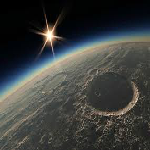

In [11]:
img

In [12]:
import numpy as np
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if result==0:
    prediction='mountain'
else:
    prediction='space'
print(prediction)

space
